# COMP809 - Lab 2

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

df = pd.read_csv("framingham.csv");
print(df.shape);
df = df.dropna(); # eliminate NA
print(df.shape);
df.reset_index(drop=True, inplace=True); # delete row names


(4238, 16)
(3656, 16)


## Question 1

In [24]:
dfc = df[["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "age"]];

## Question 2

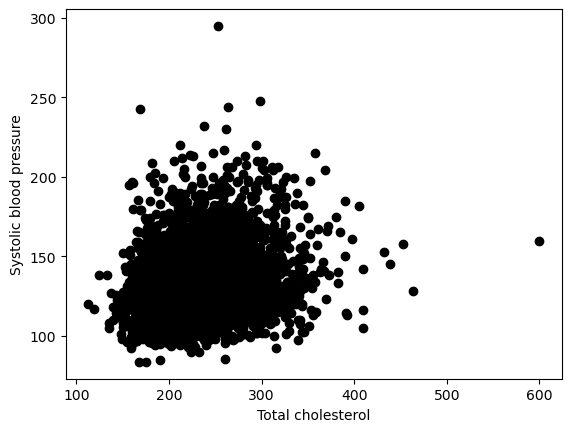

In [25]:
plt.scatter(dfc["totChol"], dfc["sysBP"], color='black')
plt.xlabel("Total cholesterol")
plt.ylabel("Systolic blood pressure")
plt.show()

# It is not clear the relationship between the variables. They seem to be positive linear relationship, i.e., as the total 
# cholesterol increases, the Systolic blood pressure increases as well.  

## Question 3

In [26]:
np.corrcoef(dfc["totChol"], dfc["sysBP"])
# The correlation coefficient is quite low, namely, 0.22.  The linear relationship between the variables is negligible.

# Alternatively
#import scipy
#scipy.stats.pearsonr(dfc["totChol"], dfc["sysBP"])


array([[1.        , 0.22012958],
       [0.22012958, 1.        ]])

## Question 4 

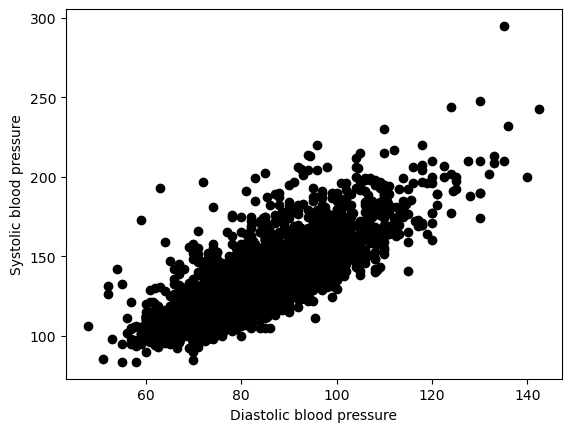

[[1.         0.78672712]
 [0.78672712 1.        ]]


In [27]:
plt.scatter(dfc["diaBP"], dfc["sysBP"], color='black')
plt.xlabel("Diastolic blood pressure")
plt.ylabel("Systolic blood pressure")
plt.show()

print(np.corrcoef(dfc["diaBP"], dfc["sysBP"]))

# It seems to be a positive linear relationship between the variables observed from the scatter plot.
# This is corroborated by the correlation coefficient 0.76, which indicates a strong positive linear relationship.
# This means that these 2 variables contain redundant information.  If both variables are used to explain a response, 
# one of them can be removed.

## Question 5 

In [28]:
corr = dfc.corr(); # we can also use np.corrcoef(dfc)
print(round(corr,3));

print("Pair of variables that has at most a weak positive relationship: ", ((np.absolute(corr) < 0.399).sum()).sum()/2); 

            cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
cigsPerDay       1.000   -0.030 -0.095 -0.057 -0.087      0.064   -0.054   
totChol         -0.030    1.000  0.220  0.175  0.121      0.093    0.050   
sysBP           -0.095    0.220  1.000  0.787  0.331      0.185    0.135   
diaBP           -0.057    0.175  0.787  1.000  0.386      0.179    0.064   
BMI             -0.087    0.121  0.331  0.386  1.000      0.074    0.084   
heartRate        0.064    0.093  0.185  0.179  0.074      1.000    0.097   
glucose         -0.054    0.050  0.135  0.064  0.084      0.097    1.000   
age             -0.189    0.268  0.389  0.209  0.137     -0.003    0.118   

              age  
cigsPerDay -0.189  
totChol     0.268  
sysBP       0.389  
diaBP       0.209  
BMI         0.137  
heartRate  -0.003  
glucose     0.118  
age         1.000  
Pair of variables that has at most a weak positive relationship:  27.0


## Question 6

In [29]:
# H0: mu_m  = mu_f
# H1: mu_m != mu_f
# where mu_m and mu_f are the means of the average number of cigarettes smoked per day for males and females, respectivelly.  

df_m = df[df["male"]==1]; # dataset for males
df_f = df[df["male"]==0]; # dataset for females

print(f_oneway(df_m["cigsPerDay"], df_f["cigsPerDay"]));

# The p-value is close to 0.  There is enough statistical evidence to reject H0.  In other words, we have enough evidence to
# state that the means of the average number of cigarettes smoked per day for males and females are different.
# So, we need to keep the variable sex in the analysis. 

F_onewayResult(statistic=450.3351320296253, pvalue=2.415048993730673e-94)


## Question 7

In [39]:
# H0: prevalent stroke and gender are independent
# H1: prevalent stroke and gender are not independent

df1 = df[["prevalentStroke", "male"]]; # Variables to be tested
#print(df1.dtypes); # print type of variables.  All are numerical

df1 = df1[["prevalentStroke","male"]].astype('category'); # From numerical into categorical
#print(df1.dtypes);
#print(df1)

data_crosstab = pd.crosstab(df1['prevalentStroke'], df1['male']); # contingency table
#print("Contingency table",data_crosstab[0])
print("Contingency table","\n",data_crosstab)

stat, p, dof, expected = chi2_contingency(data_crosstab);
print("Statistics:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print(chi2_contingency(data_crosstab)); # Chi-square value, p-value, degrees of freedom, andexpected frequencies as an array.

# Conclusion: p-value is 1.  Therefore, we do not reject H0.  This means that there is not enough statistical evidence to
# to say that prevalent stroke and gender are not independent.
# Both variables must be kept for further analyses.
# Neither of these variables can be used to explain the other one, due to their independence.

Contingency table 
 male                0     1
prevalentStroke            
0                2022  1613
1                  12     9
Statistics: 0.0
p-value: 1.0
Degrees of freedom: 1
(0.0, 1.0, 1, array([[2022.31673961, 1612.68326039],
       [  11.68326039,    9.31673961]]))


## Question 8 

In [31]:
# H0: 10 year risk of coronary heart disease and gender are independent
# H1: 10 year risk of coronary heart disease and gender are not independent

df1 = df[["TenYearCHD", "male"]]; # Variables to be tested
#print(df1.dtypes); # print type of variables.  All are numerical

df1 = df1[["TenYearCHD","male"]].astype('category'); # From numerical into categorical
#print(df1.dtypes);
#print(df1)

data_crosstab = pd.crosstab(df1['TenYearCHD'], df1['male']); # contingency table
print(data_crosstab[0])

stat, p, dof, expected = chi2_contingency(data_crosstab);
print("Chi square: ", stat)
print("p-value: ",p)
print("Degrees of freedom: ",dof)
print(chi2_contingency(data_crosstab)); # Chi-square value, p-value, degrees of freedom, andexpected frequencies as an array.

# The p-value is close to 0.  Therefore, we have enough statistical evidence to reject H0.  We can say that these variables 
# are not independent.  In conclusion, we have enough evidence to keep the variable sex in the analysis that aims to explain
# the variable 10 year risk of coronary heart disease.

TenYearCHD
0    1784
1     250
Name: 0, dtype: int64
Chi square:  30.261278459701792
p-value:  3.7758919146380037e-08
Degrees of freedom:  1
(30.261278459701792, 3.7758919146380037e-08, 1, array([[1724.1154267, 1374.8845733],
       [ 309.8845733,  247.1154267]]))


## Question 9

SDs: 
  cigsPerDay    11.92
totChol       44.09
sysBP         22.09
diaBP         11.97
BMI            4.07
heartRate     11.98
glucose       23.91
age            8.56
dtype: float64
Variability explained by PCs: 
 [0.30206849 0.44723001 0.57473099 0.69625348 0.80100361 0.89794516
 0.97676075 1.        ]
Number of variables:  8


<Figure size 640x480 with 0 Axes>

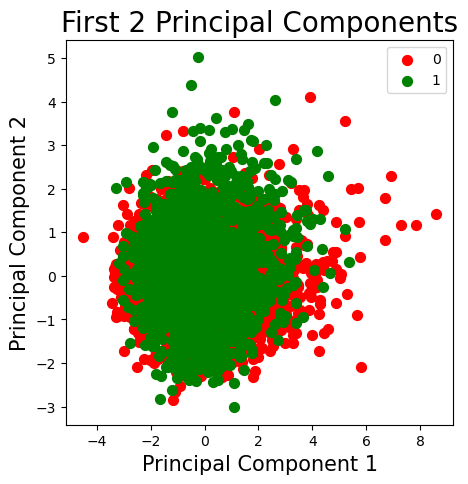

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(); # creating object
fitted = scaler.fit(dfc);
dfc_std = fitted.transform(dfc);
# In a single line
#dfc_std = StandardScaler().fit_transform(dfc) 

from sklearn.decomposition import PCA
pca = PCA(n_components=dfc_std.shape[1]); # All the possible components
principalComponents = pca.fit_transform(dfc_std);

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
finalDf = pd.concat([principalDf, df[['male']]], axis = 1)# axis{0/’index’, 1/’columns’}

plt.clf() # clean plot
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) # add_subplot(nrows, ncols, index, **kwargs)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First 2 Principal Components', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['male'] == target   
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)

# a) Yes, since the magnitude of the variability is quite different.  For instance, the SD for total cholesterol is 44, 
#    whereas the one for BMI is 4.07
print("SDs: \n ", round(np.std(dfc),2))

# b) The first 6-7 principal components are enough to capture most of the variability of these variables.
#    89.8% and 97.7%, respectively
#    Since we have 8 continuous variables, the reduction is not that significant, but it can still speed up the analysis.
print("Variability explained by PCs: \n", np.cumsum(pca.explained_variance_ratio_));
print("Number of variables: ", dfc_std.shape[1])

# c) There is not a clear difference between the genders, but we also have to consider that the first 2 components only
#    capture 45% of the variability of the data.